In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # we only use seaborn for smoothing the posteriors with kde

import numpy as np
from scipy import stats

# add the path to the abcTau package
import sys
#sys.path.append('./abcTau')
sys.path.append('C:\\Users\\ipochino\\AppData\\Local\\anaconda3\\envs\\isttc\\Lib\\site-packages\\abcTau') # IP: replaced previous line with that; relative path was not working
import abcTau

from isttc.scripts.cfg_global import project_folder_path

In [3]:
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau\\'
results_folder_abctau = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau_abctau\\all_abctau_dst_gamma\\'
datasave_path = results_folder_abctau + 'final_results\\'

In [6]:
# load abc results
filename = 'spike_train_0_steps15'
abc_results = np.load(datasave_path + filename + '.npy', allow_pickle=True)
ind = filename.find('steps') 
final_step = int(filename[ind+5] + filename[ind+6])

# extract estimated parameters
theta_accepted = abc_results[final_step-1]['theta accepted']
tau1 = theta_accepted[0]

# extract the development of the error threshold and acceptance rate during fitting (discarding first iteration)
eps = []
accR = []
steps = np.arange(1,final_step+1)[1:]
for i in range(final_step): 
    step_results = abc_results[i]
    eps.append(step_results['epsilon'])
    accR.append(step_results['n accepted']/step_results['n total'])
eps = eps[1:]
accR = accR[1:]

# ground truth values 
tau1_gt = 150

In [20]:
abc_singOU =  np.load('C:\\Users\\ipochino\\Downloads\\singTau_20_linearDist_deltaT1_lag50_steps43.npy',allow_pickle=True)

In [21]:
abc_singOU[43-1]

np.void((array([[20.22810893, 20.19319972, 20.2206745 , 19.96531371, 20.01017862,
        20.21183626, 20.1394767 , 20.22063538, 20.13391283, 20.1316716 ,
        20.00233113, 20.0388743 , 20.32478863, 20.14344324, 20.24913706,
        20.26533862, 20.16952455, 20.15111222, 20.52031556, 20.18596283,
        20.29346252, 20.08602434, 20.08948114, 20.18378591, 20.03168416,
        20.1093793 , 20.36759849, 20.09537281, 20.04663981, 19.98246496,
        20.30933032, 20.26341708, 20.03540712, 20.16930317, 20.04721704,
        20.09662407, 20.19507615, 20.34782835, 20.42517279, 20.15556805,
        19.97829636, 20.02368552, 20.22158561, 20.11805785, 20.26647339,
        20.22427487, 20.0445056 , 20.27203869, 20.28735967, 20.11654543,
        20.15410263, 20.10633681, 20.14117994, 20.20148891, 20.12570431,
        20.2622269 , 19.86758741, 20.18952339, 20.20331162, 20.05227539,
        20.08509396, 20.33296247, 20.1330355 , 20.19462003, 20.40515878,
        20.01775336, 20.01389304, 20.29872

In [16]:
from scipy.stats import gaussian_kde

def compute_map_1d_abctau(result):
    """
    Compute the 1D MAP estimate from abcTau output.
    Method per Zeraati et al. (2022):
      1. Smooth the posterior with Gaussian KDE
      2. Locate the maximum via grid search
    """
    # Extract accepted parameter samples and weights
    theta = np.asarray(result['theta accepted']).squeeze()
    weights = np.asarray(result['weights'])
    weights = weights / np.sum(weights)  # normalize to 1

    # Fit weighted Gaussian KDE (posterior smoothing)
    kde = gaussian_kde(theta, weights=weights)

    # Create fine grid over parameter space
    grid = np.linspace(theta.min(), theta.max(), 2000)

    # Evaluate density and find peak
    density = kde(grid)
    theta_map = grid[np.argmax(density)]

    return theta_map, grid, density


In [22]:
theta_map, grid, density = compute_map_1d_abctau(abc_singOU[43-1])
print(f"MAP estimate: {theta_map:.3f}")

MAP estimate: 20.247


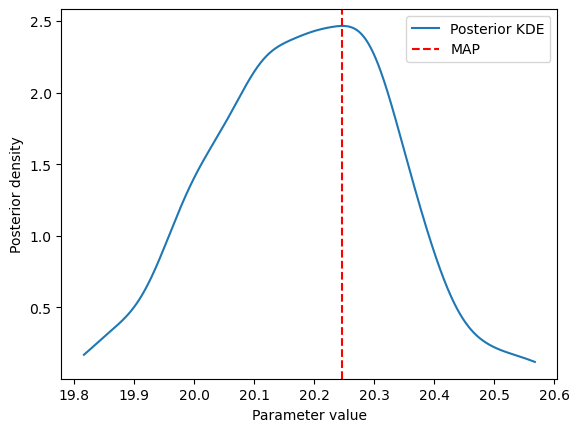

In [23]:
plt.plot(grid, density, label='Posterior KDE')
plt.axvline(theta_map, color='r', linestyle='--', label='MAP')
plt.xlabel('Parameter value')
plt.ylabel('Posterior density')
plt.legend()
plt.show()

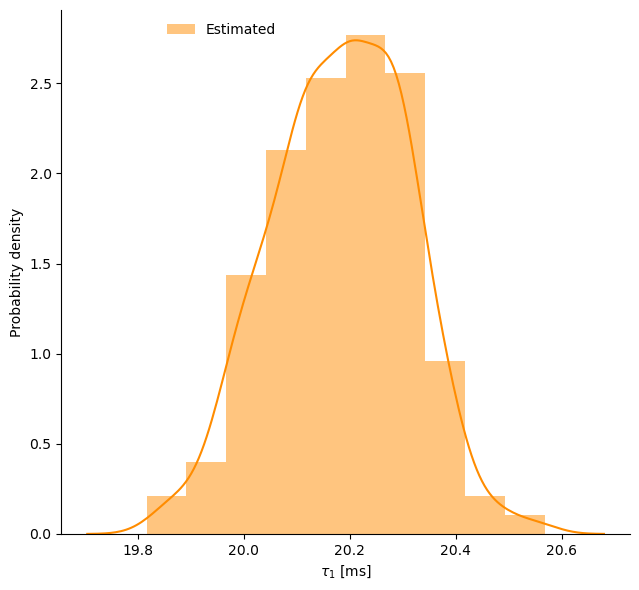

In [26]:
# plot the results
tau1 = abc_singOU[43-1]['theta accepted'][0]
fig = plt.figure(figsize = (24,6))

# plotting variables
cABC = 'darkorange'
ctheor = 'gray'
cAccR = 'r'
cErr = 'b'
a = 0.5
lw = 3

ax = plt.subplot(141)
ax.hist(tau1, facecolor= cABC, density=True, alpha = a, label = r'Estimated')
sns.kdeplot(tau1, color = cABC)
#plt.axvline(tau1_gt, color = ctheor, label = r'Ground truth', linewidth = lw, linestyle = '--')

ax.set_xlabel(r'$\tau_1$ [ms]')
ax.set_ylabel('Probability density')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon = False, bbox_to_anchor=(0.4, 1))

fig.tight_layout()
plt.show()

In [27]:
tau1.shape

(500,)